In [2]:
#Imports
import pandas as pd
import numpy as np
from tqdm import tqdm
import copy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
path = 'datasets/turkish_dataset/turkce_cumleler_kokler_corrected_50k.csv'
df = pd.read_csv(path)
df = df.drop(columns=['id', 'text'])

X = df['roots']  # Assuming 'roots' is the text feature
y = df['label']  # Assuming 'label' is the target variable

df = df.head(2000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

cols = ['label','roots']

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

X_train = np.where(pd.isna(X_train), '', X_train)
X_test = np.where(pd.isna(X_test), '', X_test)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [5]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


# Create and train the SVM model
svm_model = SVC(kernel='linear', probability=True, max_iter = 1000, tol=0.001)
svm_model.fit(X_train_tfidf, y_train)


C:\Users\pahstoner\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(kernel='linear', max_iter=1000, probability=True)

In [6]:
# Make predictions
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7962264150943397
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      2206
           1       0.75      0.85      0.80      2034

    accuracy                           0.80      4240
   macro avg       0.80      0.80      0.80      4240
weighted avg       0.80      0.80      0.80      4240



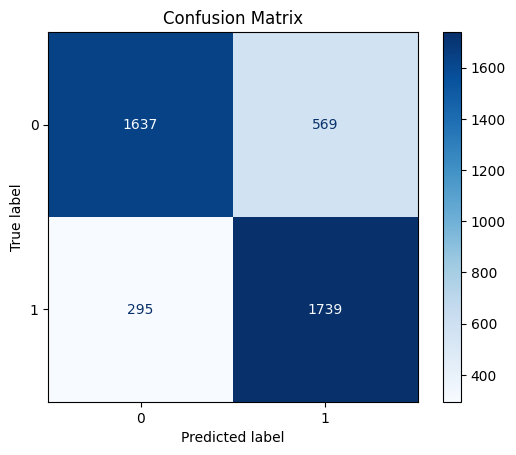

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix oluştur
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix'i görselleştir
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()